In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import scipy.stats as st
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings
import statistics
import os
%matplotlib inline

In [2]:
os.chdir("C:/Users/LENOVO/Desktop")

In [3]:
# importing dataset
df = pd.read_csv("BigBasket Products.csv")
df.head(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


In [5]:
df.shape

(27555, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [8]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [9]:
warnings.filterwarnings('ignore')

.

.

# Data Cleaning

In [10]:
# Checking for missing values
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

### -Check for outliers in Sale price column

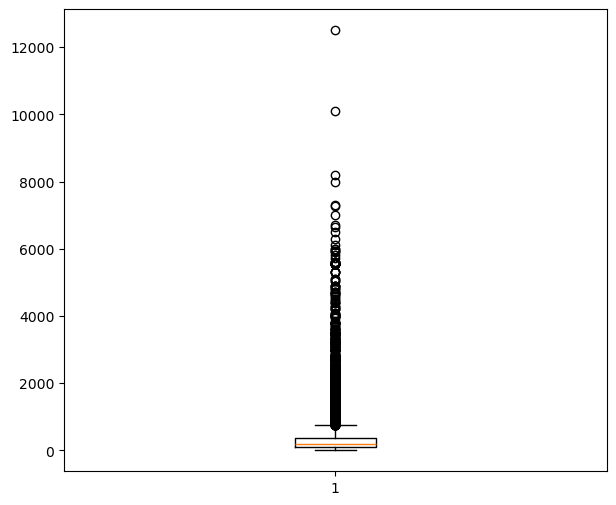

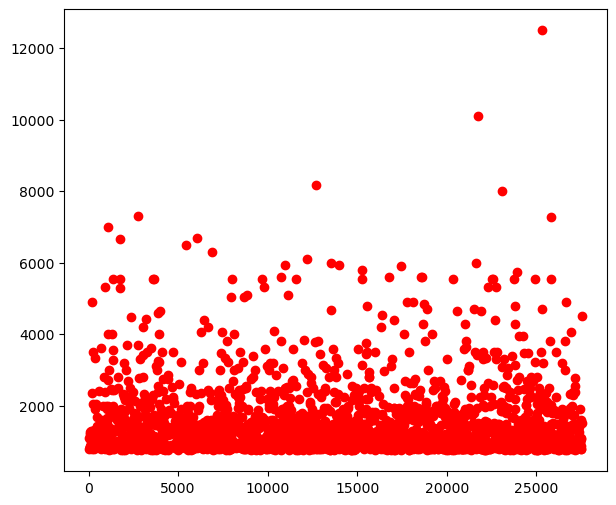

In [11]:
# Calculate the IQR for a specific column in the dataset
column_name = "sale_price"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Plot the data and highlight the outliers
plt.figure(figsize=(7, 6))
plt.boxplot(df[column_name])
plt.show()
plt.figure(figsize=(7, 6))
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

### -Check outlier for market price

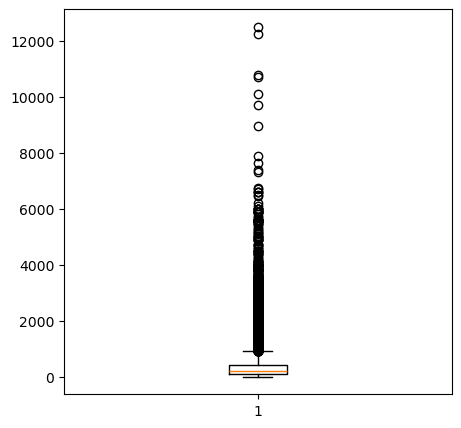

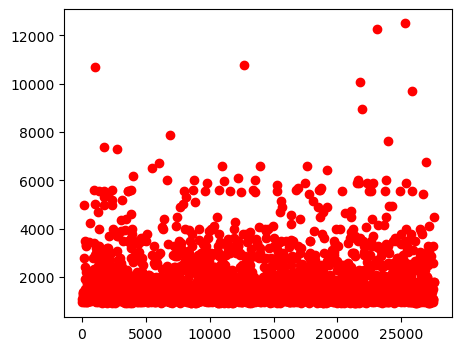

In [12]:
# Calculate the IQR for a specific column in the dataset
column_name = "market_price"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Plot the data and highlight the outliers
filtered_data = df[column_name].dropna().loc[df[column_name] != 0]

plt.figure(figsize=(5, 5))
plt.boxplot(filtered_data)
plt.show()
plt.figure(figsize=(5, 4))
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

### -Check for inconsistent data format

In [13]:
 # Check the data types of the columns in the dataset
print(df.dtypes)

# Convert specific columns to a specific data type if necessary
df['sale_price'] = df['sale_price'].astype(float)
# df['Height'] = df['Height'].astype(float)

# Define the subset of columns to check for non-numeric characters
columns_to_check = ['sale_price', 'market_price', 'rating' ]

# Check if any columns contain non-numeric characters
for column_name in columns_to_check:
    for value in df[column_name]:
        try:
            float(value)
        except ValueError:
            print(f"Column {column_name} contains non-numeric value: {value}")


index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object


### -Check for invalid data

In [14]:

# Check for invalid data in the 'Sale_price' column
invalid_rows = df[(df['sale_price'] < 0) ]          #Restricting the height of players to 200cm
if not invalid_rows.empty:
    print("Invalid values found in the 'Height' column:")
    print(invalid_rows[['sale_price']])

# Check for invalid data in the 'market_price' column
invalid_rows = df[(df['market_price'] < 0)]        # Restricting the appearances to 300
if not invalid_rows.empty:
    print("Invalid values found in the 'market_price' column:")
    print(invalid_rows[['market_price']])

# Check for invalid data in the 'rating' column
invalid_rows = df[(df['rating'] < 0)| (df['rating']>5)]
if not invalid_rows.empty:
    print("Invalid values found in the 'rating' column:")
    print(invalid_rows[['rating']])



### -Handle missing values

In [15]:

# Option 1: Drop missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with mean/median/mode
df["sale_price"].fillna(df["sale_price"].mean())


0        220.00
1        180.00
2        119.00
3        149.00
4        162.00
          ...  
27550    199.20
27551     67.50
27552    200.00
27553    396.00
27554    214.53
Name: sale_price, Length: 18840, dtype: float64

In [16]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [17]:
df.reset_index(drop=True, inplace=True)
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### -Check for outliers

In [18]:

# Option 1: Z-Score
z = np.abs(st.zscore(df["sale_price"]))
print(z)


# Option 2: Interquartile Range (IQR)
Q1 = df["sale_price"].quantile(0.25)
Q3 = df["sale_price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower,upper)
print(df[(df["sale_price"] < lower) | (df["sale_price"] > upper)])

# Handle outliers
# Option 1: Drop outliers
df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
df.loc[df["sale_price"] < lower, "sale_price"] = lower  # Use .loc to assign values
df.loc[df["sale_price"] > upper, "sale_price"] = upper  # Use .loc to assign values

0        0.130852
1        0.240624
2        0.408027
3        0.325698
4        0.290022
           ...   
18835    0.187934
18836    0.549359
18837    0.185738
18838    0.352146
18839    0.145863
Name: sale_price, Length: 18840, dtype: float64
-246.5 637.5
       index                                            product  \
8          9  Biotin & Collagen Volumizing Hair Shampoo + Bi...   
25        26  Insulated Hot Fresh Casserole For Roti/Chapati...   
47        48                              Colour Catcher Sheets   
51        52                                        Peach Syrup   
77        92    Hard Anodised Ezee-Pour Saucepan With Lid - L88   
...      ...                                                ...   
18768  27471                                            Nutella   
18772  27475                        Green Tea Bags - Detox Pack   
18791  27499            Juicer - Fruit & Vegetable, Light Green   
18823  27539  Quista Pro Advanced Whey Protein Formula forti...   
1882

### -Check for inconsistent data format

In [19]:
# Option 1: Check data type of columns
print(df.dtypes)

# Option 2: Check unique values of columns
print(np.sort(df["category"].unique()))

# Handle inconsistent data format
# Option 1: Convert data type of columns
df.loc[:,"index"] = df["index"].astype(str)

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object
['Baby Care' 'Bakery, Cakes & Dairy' 'Beauty & Hygiene' 'Beverages'
 'Cleaning & Household' 'Foodgrains, Oil & Masala' 'Gourmet & World Food'
 'Kitchen, Garden & Pets' 'Snacks & Branded Foods']


## Add a discount column in dataframe

In [20]:
# Calculate the discount amount
df['Discount'] = df['market_price'] - df['sale_price']

# Calculate the discount percentage
df['Discount_Percentage'] = (df['Discount'] / df['market_price']) * 100

# Display the updated DataFrame to check the new columns
print(df[['sale_price', 'market_price', 'Discount', 'Discount_Percentage']].head())

   sale_price  market_price  Discount  Discount_Percentage
0       220.0         220.0       0.0             0.000000
1       180.0         180.0       0.0             0.000000
2       119.0         250.0     131.0            52.400000
3       149.0         176.0      27.0            15.340909
4       162.0         162.0       0.0             0.000000


In [21]:
# Categorize Discount Percentage into Low, Medium, and High
conditions = [(df['Discount_Percentage'] == 0),
    (df['Discount_Percentage'] > 0) & (df['Discount_Percentage'] < 10),
    (df['Discount_Percentage'] > 10) & (df['Discount_Percentage'] < 40),
    (df['Discount_Percentage'] >= 40) & (df['Discount_Percentage'] < 60),
    (df['Discount_Percentage'] >= 60)
]

# Define the corresponding category for each condition
categories = ['None','Low', 'Medium', 'High','Clearance']

# Create a new column 'Discount Category' based on the conditions
df['Discount Category'] = np.select(conditions, categories, default='Not Applicable')

# Display the updated DataFrame to check the new column
print(df[['Discount_Percentage', 'Discount Category']].head(16))

    Discount_Percentage Discount Category
0              0.000000              None
1              0.000000              None
2             52.400000              High
3             15.340909            Medium
4              0.000000              None
5             15.075377            Medium
6              0.000000              None
7              0.000000              None
8             41.939891              High
9              0.000000              None
10            10.000000    Not Applicable
11             0.000000              None
12             0.000000              None
13             0.000000              None
14             0.000000              None
15            16.949153            Medium


# Encode the species variable
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])

.

.

.

# Data Analysis

In [22]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Discount,Discount_Percentage,Discount Category
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.0,0.000000,None
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.0,0.000000,None
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.0,52.400000,High
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.0,15.340909,Medium
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.0,0.000000,None


In [23]:
# Lists to store different types of columns
cat = []        # Categorical columns
num = []        # Numerical columns
identifier = [] # Columns to exclude from cat/num (e.g., Invoice ID, Date, Time)

# Columns to exclude from categorical or numerical classification
exclude = ['index']

# Loop through each column in the dataset
for column in df.columns:
    if column in exclude:
        identifier.append(column)  # Add to identifier list if it's in the exclude list
    elif pd.api.types.is_numeric_dtype(df[column]):
        if df[column].nunique() > 10:
            num.append(column)  # Add to numerical list if it has more than 10 unique values
        else:
            cat.append(column)  # Otherwise, treat it as categorical
    else:
        cat.append(column)  # Non-numeric columns are treated as categorical

# Print out the categorized lists
print("Categorical columns:", cat)
print("Numerical columns:", num)
print("Identifier columns:", identifier)

Categorical columns: ['product', 'category', 'sub_category', 'brand', 'type', 'description', 'Discount Category']
Numerical columns: ['sale_price', 'market_price', 'rating', 'Discount', 'Discount_Percentage']
Identifier columns: ['index']


.

.

# 1. Univariate Analysis

## Categorical

>Displaying the numbers of different categories using pie chart

In [24]:
df['category'].value_counts()

category
Beauty & Hygiene            5333
Snacks & Branded Foods      2468
Gourmet & World Food        2341
Kitchen, Garden & Pets      2333
Foodgrains, Oil & Masala    2156
Cleaning & Household        2078
Bakery, Cakes & Dairy        665
Beverages                    628
Baby Care                    458
Name: count, dtype: int64

Text(0.5, 1.0, 'category')

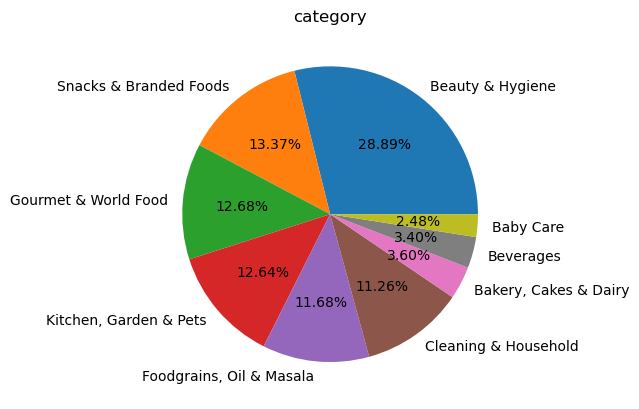

In [25]:
df['category'].value_counts().plot(kind="pie",autopct="%1.2f%%" , ylabel='')
plt.title('category')

Here we can see that the percentage of Beauty and Hygiene products is largest

>Displaying number of different categories using barchart

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Snacks & Branded Foods'),
  Text(2, 0, 'Gourmet & World Food'),
  Text(3, 0, 'Kitchen, Garden & Pets'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Cleaning & Household'),
  Text(6, 0, 'Bakery, Cakes & Dairy'),
  Text(7, 0, 'Beverages'),
  Text(8, 0, 'Baby Care')])

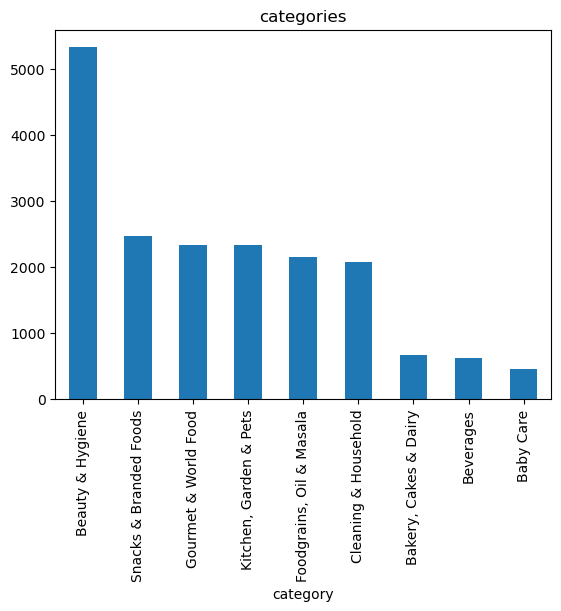

In [26]:
df['category'].value_counts().plot(kind="bar")
plt.title('categories')
plt.xticks(rotation=90)

Here also we can see that the percentage of Beauty and Hygiene products is largest

.

## Numerical

In [29]:
num

['sale_price', 'market_price', 'rating', 'Discount', 'Discount_Percentage']

>Plotting the distribution of Ratings

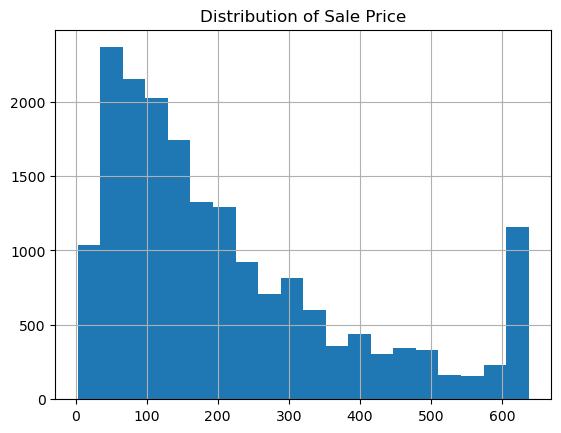

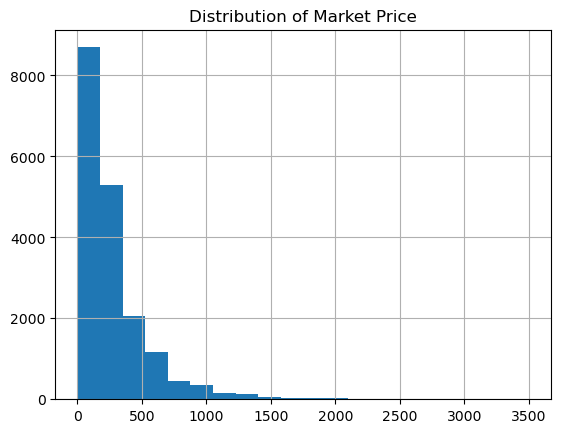

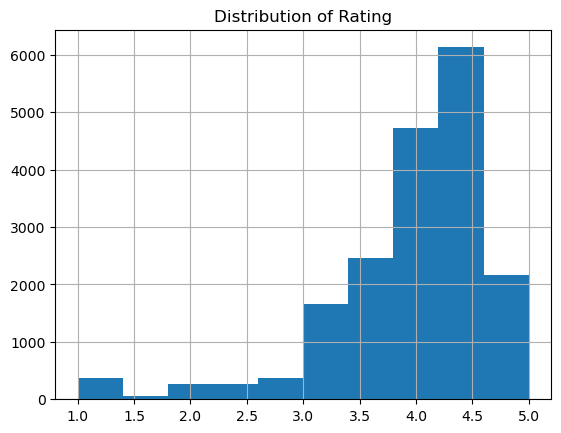

In [30]:
df['sale_price'].hist(bins=20)
plt.title('Distribution of Sale Price')
plt.show()

df['market_price'].hist(bins=20)
plt.title('Distribution of Market Price')
plt.show()

df['rating'].hist(bins=10)
plt.title('Distribution of Rating')
plt.show()


Text(0.5, 1.0, 'Distribution of sale_price')

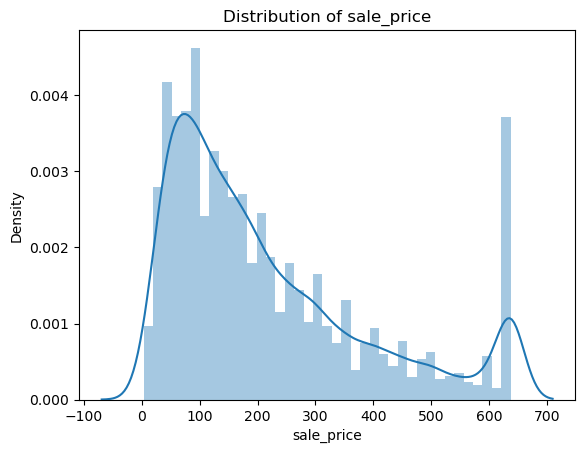

In [31]:
sns.distplot(df['sale_price'])
plt.title('Distribution of sale_price')

The distribution of Sale Price is right-skewed, with most prices concentrated between 100 and 300, a sharp peak around 600 indicating potential outliers or price standardization, and a decreasing frequency of higher-priced items

Text(0.5, 1.0, 'Distribution of market_price')

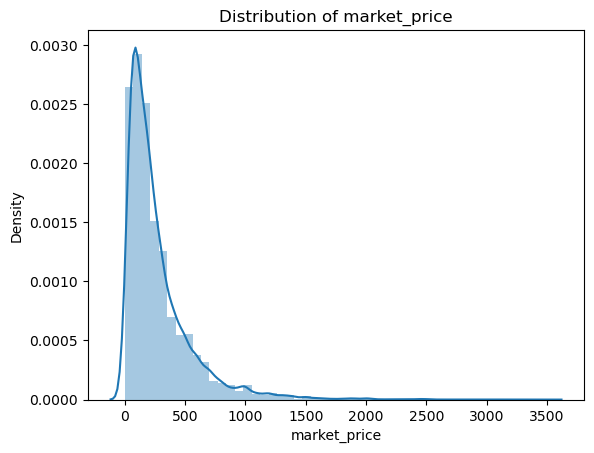

In [32]:
sns.distplot(df['market_price'])
plt.title('Distribution of market_price')

The distribution of market_price is right-skewed, with most prices concentrated below 500 and a long tail extending towards higher values.

Text(0.5, 1.0, 'Distribution of rating')

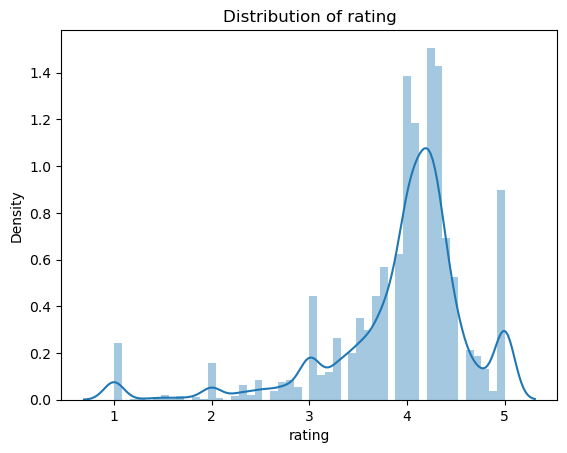

In [33]:
sns.distplot(df['rating'])
plt.title('Distribution of rating')

The distribution of ratings is left-skewed, with a concentration of ratings around 4 and a smaller peak near 5.

Text(0.5, 1.0, 'Box Plot of sale_price')

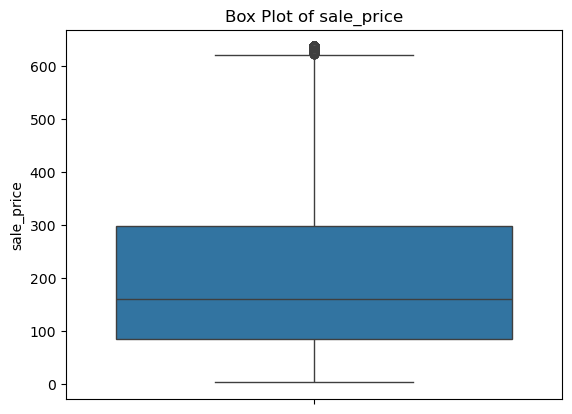

In [34]:
sns.boxplot(df['sale_price'])
plt.title('Box Plot of sale_price')

The box plot shows a moderately skewed distribution of Sale Price, with the middle 50% of prices ranging between approximately 150 and 300, and a few higher values extending to around 600.

In [35]:
df['sale_price'].skew()

1.1107633996252677

In [36]:
df['sale_price'].describe()

count    18460.000000
mean       215.309198
std        172.177753
min          3.000000
25%         84.000000
50%        160.000000
75%        299.000000
max        637.500000
Name: sale_price, dtype: float64

Text(0.5, 1.0, 'Box Plot of market_price')

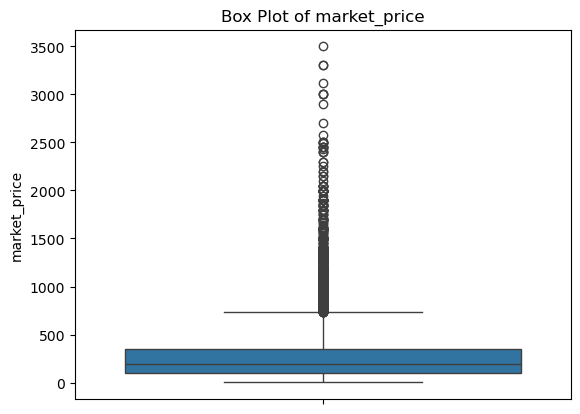

In [37]:
sns.boxplot(df['market_price'])
plt.title('Box Plot of market_price')

The box plot shows that the market_price data contains many outliers above 1000, with most values concentrated below 500.

In [38]:
df['market_price'].describe()

count    18460.000000
mean       274.689481
std        284.573666
min          3.000000
25%         95.000000
50%        190.000000
75%        350.000000
max       3499.000000
Name: market_price, dtype: float64

In [39]:
df['market_price'].skew()

2.862799650667331

Text(0.5, 1.0, 'Box Plot of rating')

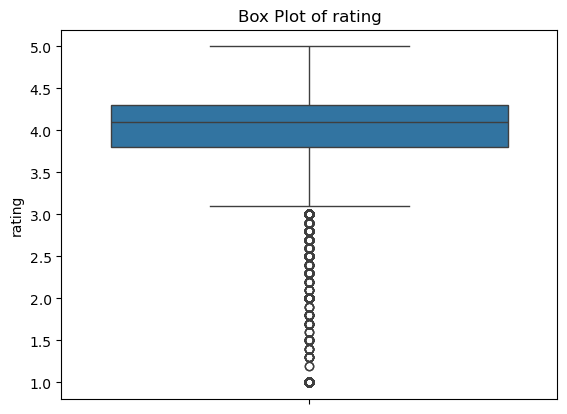

In [40]:
sns.boxplot(df['rating'])
plt.title('Box Plot of rating')

The box plot indicates that most of the ratings are concentrated between 3.8 and 4.5, with a median around 4. There are several outliers below the lower whisker, reaching as low as 1. The data suggests that while ratings are generally high, a small number of low ratings exist.

In [41]:
df['rating'].skew()

-1.7396766048212484

In [43]:
df['rating'].describe()

count    18460.000000
mean         3.946668
std          0.729487
min          1.000000
25%          3.800000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64

.

.

# 2. Bivariate Analysis

## Numerical-Numerical

In [44]:
num

['sale_price', 'market_price', 'rating', 'Discount', 'Discount_Percentage']

<Axes: xlabel='sale_price', ylabel='market_price'>

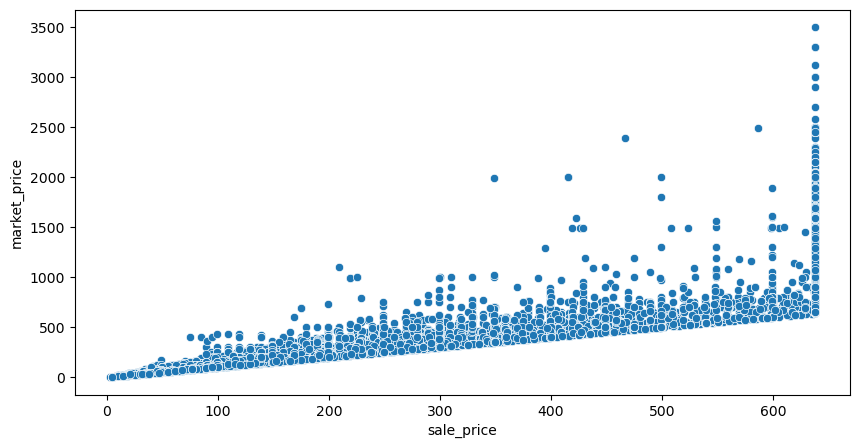

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df,x="sale_price",y="market_price")

Insights:


Positive correlation: Overall, the trend indicates a positive correlation between sale price and market price, meaning that more expensive items in terms of sale price tend to have higher market prices as well.
Outliers: There are a few points where the market price is significantly higher for a lower sale price (for instance, sale price below 200 but market price is over 1000). These could be outliers or exceptional cases.

In [71]:
correlation = df[['sale_price', 'market_price']].corr()
print(correlation)

              sale_price  market_price
sale_price      1.000000      0.883409
market_price    0.883409      1.000000


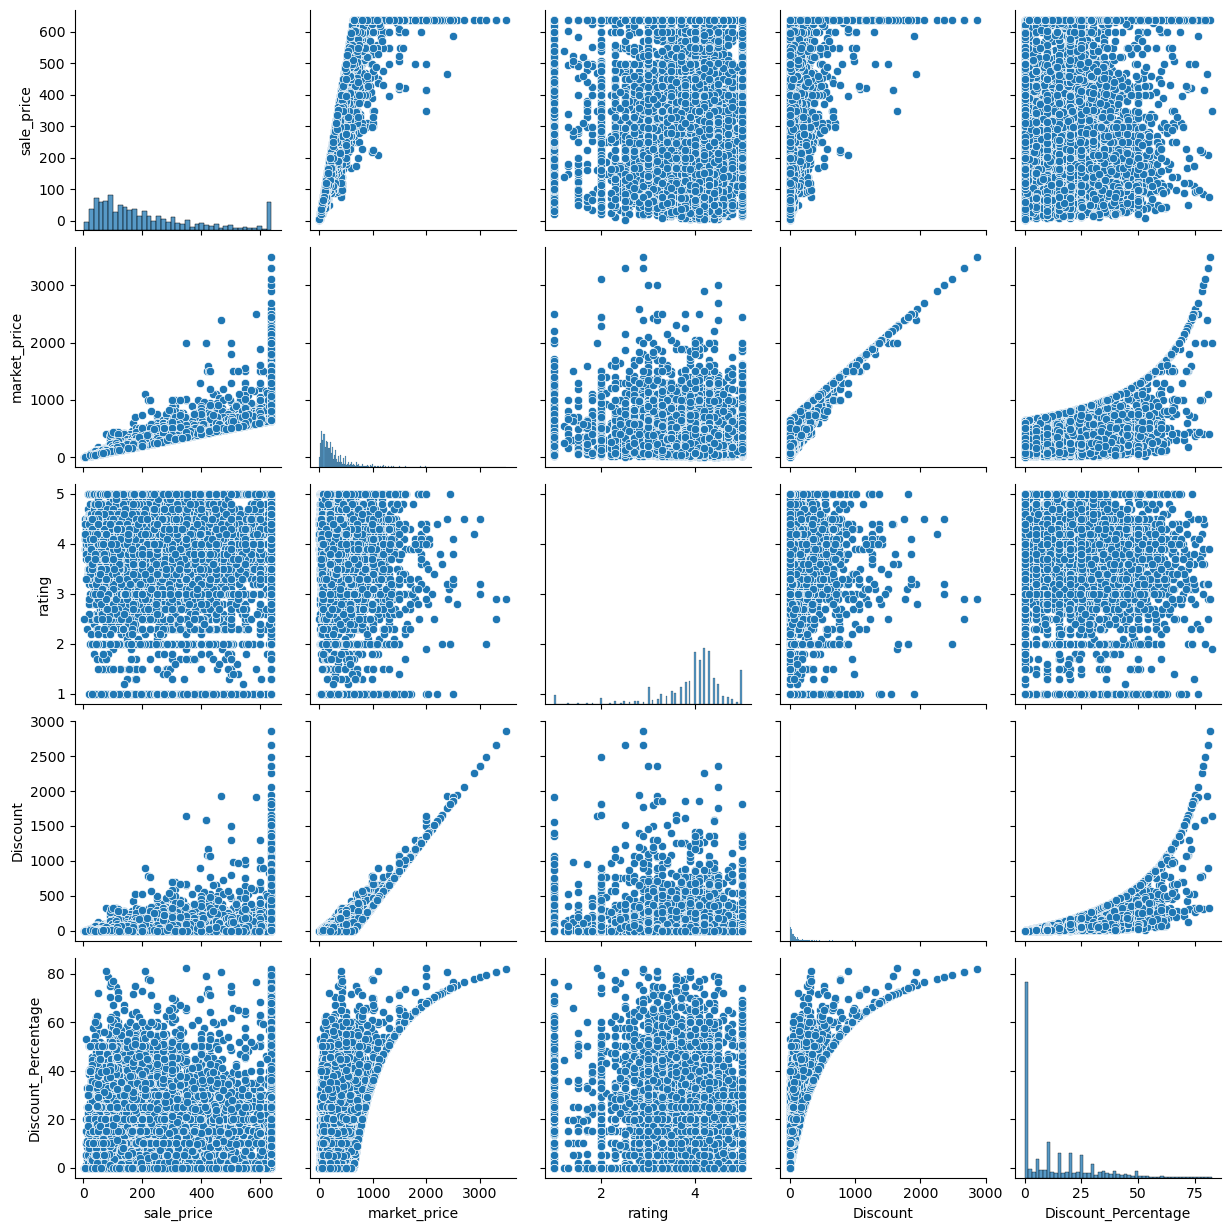

In [70]:
g = sns.pairplot(df)
plt.savefig("pairplot.png", dpi=300)

Sale Price and Market Price have a strong positive correlation.

Discount and Market Price are also positively correlated.

Rating doesn't seem to have a strong relationship with pricing or discounts.

There is a non-linear relationship between Discount and Discount Percentage.

In [47]:
# Linear - Numerical and Numerical
x = df['sale_price'].to_numpy()
y = df['Discount_Percentage'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.27739805],
       [0.27739805, 1.        ]])

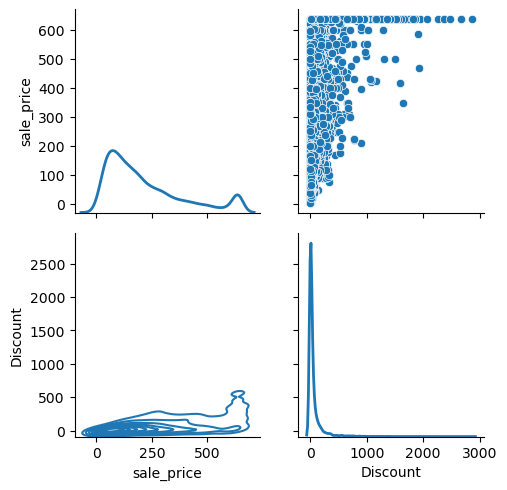

In [48]:
df2=df.drop(columns=['index','product',	'category',	'sub_category',	'brand', 'market_price','type','rating','description','Discount_Percentage','Discount Category'])
df2.dropna(axis=0,how='any')
g = sns.PairGrid(df2)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

General Observations:


Most products have a low sale price and low discount.
There is a positive correlation between sale_price and Discount, meaning higher-priced items tend to have higher discounts, but this is not always consistent.
Both variables are right-skewed, indicating that higher values (either sale prices or discounts) are less common.

.

.

## Categorical - Numerical

In [49]:
cat

['product',
 'category',
 'sub_category',
 'brand',
 'type',
 'description',
 'Discount Category']

In [50]:
num

['sale_price', 'market_price', 'rating', 'Discount', 'Discount_Percentage']

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care')])

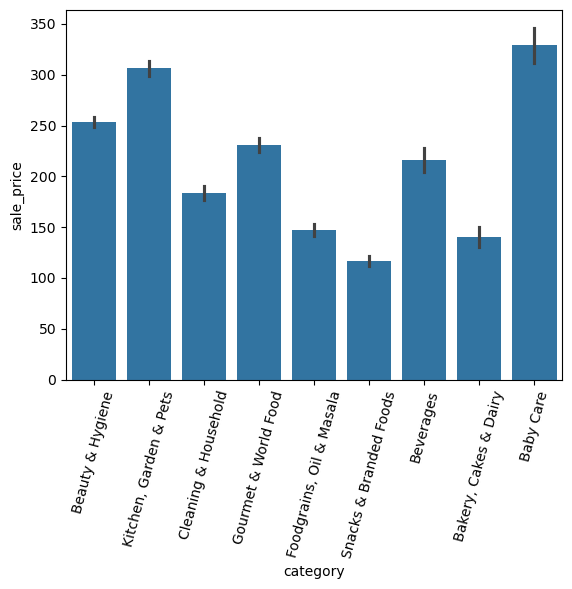

In [51]:
sns.barplot(data=df,x="category",y="sale_price")
plt.xticks(rotation=75)

General Observations:
Categories like Baby Care, Kitchen & Garden, and Beauty & Hygiene tend to have higher prices.
Basic consumables like Foodgrains, Oil & Masala and Bakery, Cakes & Dairy are more affordable, possibly reflecting their necessity and high demand.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care')])

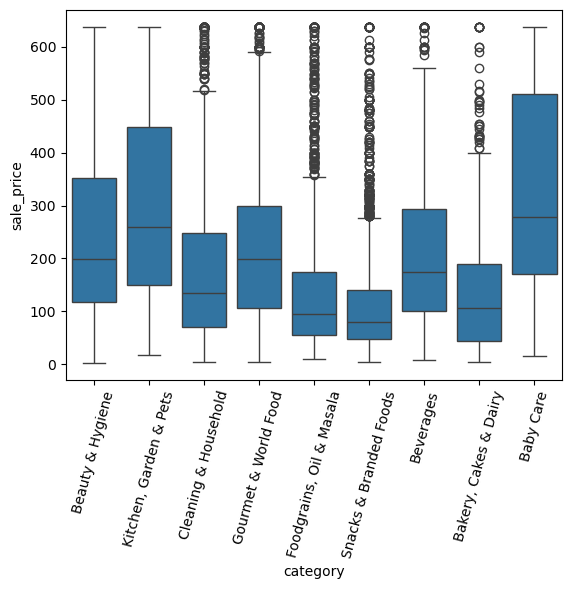

In [52]:
sns.boxplot(data=df, x="category", y="sale_price")
plt.xticks(rotation=75)

The bar chart shows that the "Kitchen, Garden & Pets" category offers the highest average discount, followed by "Baby Care." In contrast, categories like "Bakery, Cakes & Dairy" and "Snacks & Branded Foods" provide relatively lower discounts.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care')])

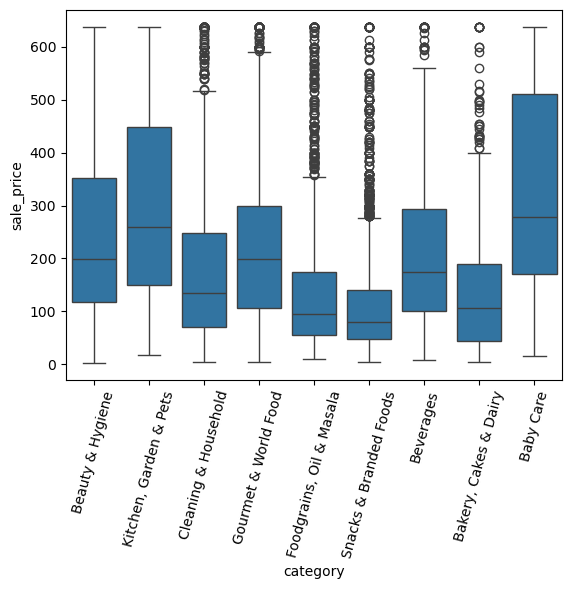

In [53]:
sns.boxplot(data=df, x="category", y="sale_price")
plt.xticks(rotation=75)

The box plot analysis reveals the following key points:

1. Median Prices: Vary significantly across categories, with "Baby Care" and "Beverages" having lower medians compared to "Beauty & Hygiene" and "Gourmet & World Food."
2. Price Variability: "Snacks & Branded Foods" and "Beverages" show a wide interquartile range, indicating greater price variability.
3. Outliers: Notable outliers in "Gourmet & World Food" and "Snacks & Branded Foods" suggest some high-priced items.
4. Category Comparison: "Beauty & Hygiene" and "Gourmet & World Food" have the highest prices, while "Cleaning & Household" and "Baby Care" are more budget-friendly.
5. Overall Trends: Food categories exhibit a wider price range, while non-food items also offer premium options.

In summary, the analysis highlights significant price differences and variability across product categories, which can inform pricing strategies for retailers.

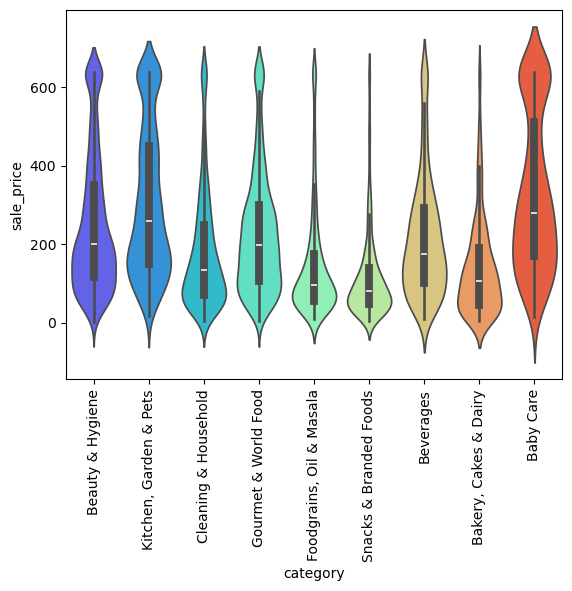

In [74]:
sns.violinplot(x='category',y='sale_price',data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.savefig("violin.png", dpi=300)

1. Price Distribution: The plot shows the distribution of sale prices across various categories, with each "violin" representing a category.
2. Median Prices: The median sale prices vary, with "Dairy" and "Beauty & Hygiene" generally having higher medians compared to others.
3. Variability: Categories like "Household" and "Beverages" exhibit wider distributions, indicating greater variability in prices.
4. Outliers: Some categories, particularly "Dairy" and "Masala Foods," show potential outliers, suggesting the presence of high-priced items.
5. Overall Trends: The plot indicates that food-related categories tend to have a broader range of prices, while non-food categories like "Beauty & Hygiene" also feature premium pricing.
In summary, the violin plot highlights significant differences in price distributions across product categories, useful for understanding market positioning and pricing strategies.

In [55]:
# t-test - Categorical and Numerical
tr=df.dropna(axis=0,how='any')
tr.describe()

,sale_price,market_price,rating,Discount,Discount_Percentage
count,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000
mean,215.309198,274.689481,3.946668,59.380283,12.831504
std,172.177753,284.573666,0.729487,155.106804,15.621033
min,3.000000,3.000000,1.000000,0.000000,0.000000
25%,84.000000,95.000000,3.800000,0.000000,0.000000
50%,160.000000,190.000000,4.100000,8.000000,7.608696
75%,299.000000,350.000000,4.300000,51.000000,21.578947
max,637.500000,3499.000000,5.000000,2861.500000,82.506266


In [56]:
a = tr.loc[tr['category'] == 'Beauty & Hygiene', 'sale_price'].to_numpy()
b = tr.loc[tr['category'] == 'Baby Care', 'sale_price'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

TtestResult(statistic=-8.623630896109493, pvalue=8.271855458311463e-18, df=5789.0)

In [57]:
# ANOVA - Categorical and Numerical
a = tr.loc[tr['category'] == 'Beauty & Hygiene'     , 'sale_price'].to_numpy()
b = tr.loc[tr['category'] == 'Baby Care'            , 'sale_price'].to_numpy()
c = tr.loc[tr['category'] == 'Cleaning & Household' , 'sale_price'].to_numpy()
d = tr.loc[tr['category'] == 'Kitchen, Garden & Pets' , 'sale_price'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c,d)
print("f value=",fvalue)
print('p value=',pvalue)

f value= 208.8611516556066
p value= 1.7520844618323045e-131


.

.

## Categorical - Categorical

In [58]:
cat

['product',
 'category',
 'sub_category',
 'brand',
 'type',
 'description',
 'Discount Category']

<Axes: xlabel='category'>

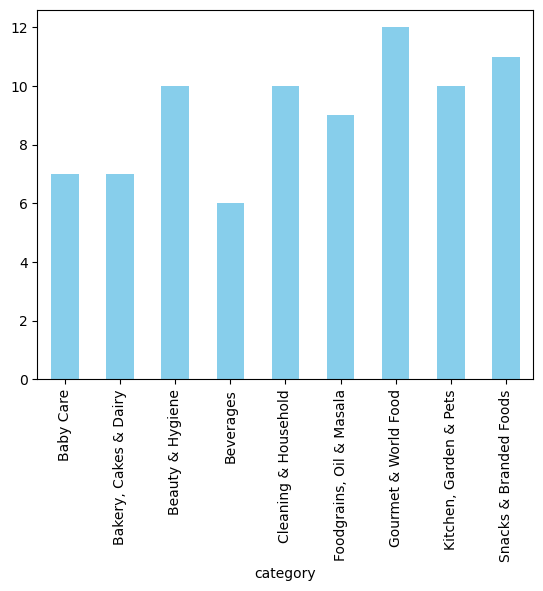

In [59]:
subcat_counts=df.groupby(['category'])['sub_category'].nunique()
subcat_counts.plot(kind='bar', color='skyblue')

1. Highest Sales: "Gourmet & World Food" and "Snacks & Branded Foods" have the highest sales, indicating strong consumer interest.
2. Moderate Sales: Categories like "Baby Care," "Beauty & Hygiene," and "Bakery, Cakes & Dairy" show moderate sales, suggesting steady demand.
3. Lowest Sales: "Cleaning & Household" has the lowest sales, which may indicate less consumer focus or competition in this category.
4. Overall Trends: Food-related categories dominate sales, reflecting consumer preferences for gourmet and branded products.

In summary, the chart highlights strong sales in gourmet and snack categories, with moderate interest in personal care and lower sales in household items.

In [60]:
pd.crosstab(df['category'],df['Discount Category'])

Discount Category,Clearance,High,Low,Medium,None,Not Applicable
category,,,,,,
Baby Care,3,31,60,95,267,2
"Bakery, Cakes & Dairy",0,6,80,181,332,66
Beauty & Hygiene,56,356,598,2366,1665,292
Beverages,1,36,48,180,334,29
Cleaning & Household,11,138,342,618,917,52
"Foodgrains, Oil & Masala",3,117,355,702,923,56
Gourmet & World Food,9,86,246,413,1339,248
"Kitchen, Garden & Pets",105,447,190,1277,310,4
Snacks & Branded Foods,4,58,223,469,1573,141


The table shows that "Beauty & Hygiene" and "Kitchen, Garden & Pets" have the highest number of low-discount items, while "Snacks & Branded Foods" and "Beverages" have the most items with no discount. Categories like "Gourmet & World Food" and "Cleaning & Household" also show a significant number of low and medium discounts.

<Axes: xlabel='Discount Category', ylabel='category'>

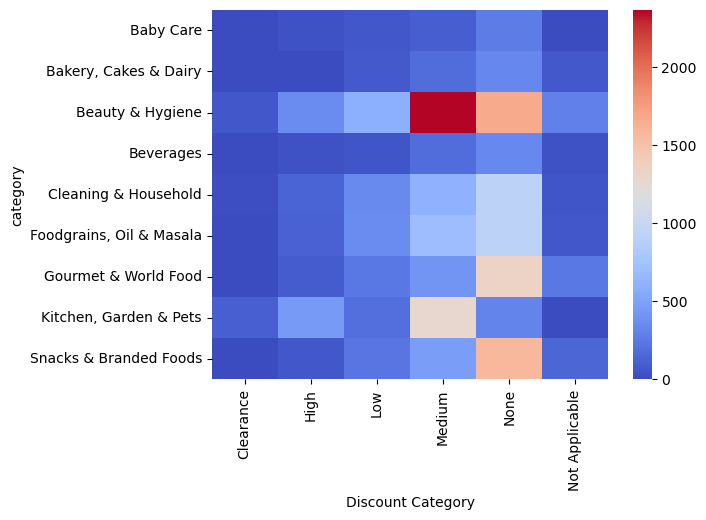

In [61]:
sns.heatmap(pd.crosstab(df['category'] ,df['Discount Category']) , cmap='coolwarm')

Key Observations:


- Some categories, like "Bakery, Cakes & Dairy," have high item counts in certain discount categories.
- The "Medium" discount category appears to have a mix of item counts, while "High" shows lower counts.
- "Not Applicable" holds a significant number for "Beverages," indicating perhaps a pricing strategy where these items typically aren't discounted

 The most number of low discounts are in Beauty and Hygiene category. 

In [62]:
# Chi2 test - Categorical and Categorical
contigency= pd.crosstab(df['category'], df['Discount Category']) 
contigency

Discount Category,Clearance,High,Low,Medium,None,Not Applicable
category,,,,,,
Baby Care,3,31,60,95,267,2
"Bakery, Cakes & Dairy",0,6,80,181,332,66
Beauty & Hygiene,56,356,598,2366,1665,292
Beverages,1,36,48,180,334,29
Cleaning & Household,11,138,342,618,917,52
"Foodgrains, Oil & Masala",3,117,355,702,923,56
Gourmet & World Food,9,86,246,413,1339,248
"Kitchen, Garden & Pets",105,447,190,1277,310,4
Snacks & Branded Foods,4,58,223,469,1573,141


Key Insights:

   - **Focus Areas**: Beauty & Hygiene and Beverages seem to have a broad range of discount items.
   - **Potential Weakness**: Bakery, Cakes & Dairy might need attention as it lacks clearance items.

In [63]:
contigency_pct= pd.crosstab(df['category'], df['Discount Category'], normalize ='index') 
contigency_pct

Discount Category,Clearance,High,Low,Medium,None,Not Applicable
category,,,,,,
Baby Care,0.006550,0.067686,0.131004,0.207424,0.582969,0.004367
"Bakery, Cakes & Dairy",0.000000,0.009023,0.120301,0.272180,0.499248,0.099248
Beauty & Hygiene,0.010501,0.066754,0.112132,0.443653,0.312207,0.054753
Beverages,0.001592,0.057325,0.076433,0.286624,0.531847,0.046178
Cleaning & Household,0.005294,0.066410,0.164581,0.297401,0.441290,0.025024
"Foodgrains, Oil & Masala",0.001391,0.054267,0.164657,0.325603,0.428108,0.025974
Gourmet & World Food,0.003845,0.036736,0.105083,0.176420,0.571978,0.105938
"Kitchen, Garden & Pets",0.045006,0.191599,0.081440,0.547364,0.132876,0.001715
Snacks & Branded Foods,0.001621,0.023501,0.090357,0.190032,0.637358,0.057131


<Axes: xlabel='Discount Category', ylabel='category'>

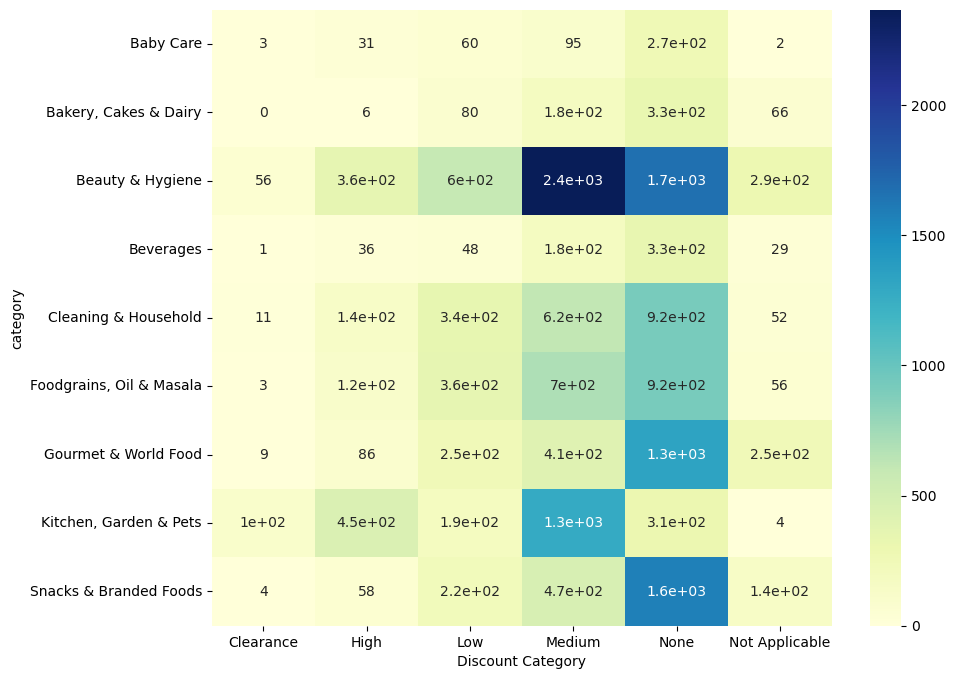

In [64]:
plt.figure(figsize=(10,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

General Observations:

 - The distribution shows a concentration of products in specific areas, particularly in Beauty & Hygiene.
 - There’s a trend toward non-discounted items across most categories, suggesting potential pricing strategies.

In [65]:
c, p, dof, expected = chi2_contingency(contigency) 
print(p)

0.0


# Conclusion

From the univariate and bivariate analysis, we can draw the following conclusions about the dataset:

### 1.  Category Insights:

Beauty & Hygiene is the most dominant category in terms of product count, which suggests a strong consumer focus on personal care items.
Categories like Kitchen, Garden & Pets, Cleaning & Household, and Baby Care also show significant product presence but with varying price points and discount strategies.

### 2. Price Distributions:

Sale Price and Market Price both exhibit right-skewed distributions, meaning that the majority of products fall into the lower to mid-range price points, while higher prices are less common. This could be indicative of retailers targeting affordability with a few premium-priced products.
Categories such as Beauty & Hygiene and Gourmet & World Food tend to have higher sale prices, indicating a premium pricing strategy in these segments.

### 3.  Discount Patterns:

Categories like Beauty & Hygiene and Kitchen, Garden & Pets offer higher average discounts, which could be reflective of frequent promotional offers in these segments to drive sales.
Beverages and Snacks & Branded Foods show lower discount percentages, potentially indicating a strategy to maintain higher profit margins.
Gourmet & World Food stands out with both high sale prices and high discounts, suggesting it could be a luxury or niche category with seasonal or targeted promotions.

### 4. Rating Distributions:

Ratings are generally high across all categories, with most products falling between 3.8 and 4.5. This suggests that the majority of products are well-received by consumers.
There are a few low ratings (below 3.5), but these are outliers, which means most customers are satisfied with the products.

### 5.  Correlation Between Sale Price and Market Price:

There is a positive correlation between Sale Price and Market Price, meaning products with a higher market price tend to also have a higher sale price.
However, some outliers exist where products have a significantly higher market price but a lower sale price. This could indicate discounts or special offers for those items.

### 6.  Sales Trends:

Gourmet & World Food and Snacks & Branded Foods show the highest sales, suggesting strong demand for these categories. On the other hand, Cleaning & Household exhibits the lowest sales, which may suggest lower consumer interest or fewer promotions in this segment.

### 7.  Price Variability Across Categories:

Categories like Snacks & Branded Foods and Beverages exhibit a wide range of prices, indicating greater variability in consumer demand and possibly offering products at different price points to cater to diverse customers.
Baby Care and Cleaning & Household are more budget-friendly, with lower price points, indicating that these categories might focus on essential and daily-use items.

### 8. Outliers and Potential Improvements:

There are several outliers in the data, particularly with very high market prices in categories like Gourmet & World Food and Snacks & Branded Foods. These could be luxury or specialty items.
Some products, especially in categories like Bakery, Cakes & Dairy, have fewer discounted items, suggesting that these categories could benefit from more promotions to drive sales.



# Strategic Insights for Retailers:


1. Pricing Strategy: Retailers could focus on optimizing pricing in high-demand categories like Snacks & Branded Foods and Beauty & Hygiene, as they exhibit higher variability and customer interest.
2. Promotion Optimization: Offering more discounts in categories like Bakery, Cakes & Dairy and Cleaning & Household could boost sales in these areas, as they currently have lower discount rates and sales figures.
3. Product Focus: Investing in promotions and product diversity for Baby Care and Gourmet & World Food can leverage consumer interest in premium and essential products.
Customer Satisfaction: Maintaining the high level of customer satisfaction, as evidenced by the high ratings, should remain a priority. However, retailers should address outliers with low ratings to ensure overall quality.

In conclusion, this analysis provides a comprehensive overview of price, discount, sales, and rating trends across categories, offering valuable insights for better pricing and promotion strategies to enhance sales and customer satisfaction.